Learning to create visualizations that "speak". Transforming a raw `matplotlib` chart into a professional business slide by applying storytelling principles.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Simple dataset for demos
df_demo = pd.DataFrame({
    'Quarter': ['Q1', 'Q2', 'Q3', 'Q4'],
    'Sales': [100, 105, 102, 130],
    'Employees': [50, 52, 55, 60]
})

#SLIDE - TOOLKIT

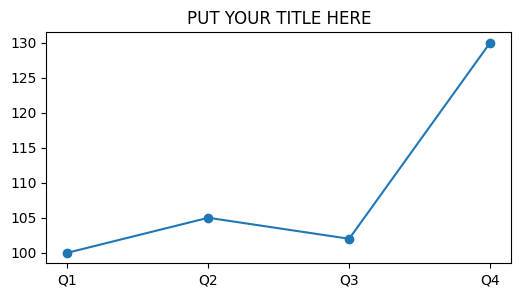

In [ ]:
# Question 1: What is the TREND? -> Line Chart
plt.figure(figsize=(6, 3))
plt.plot(df_demo['Quarter'], df_demo['Sales'], marker='o')
plt.title("PUT YOUR TITLE HERE")
plt.show()

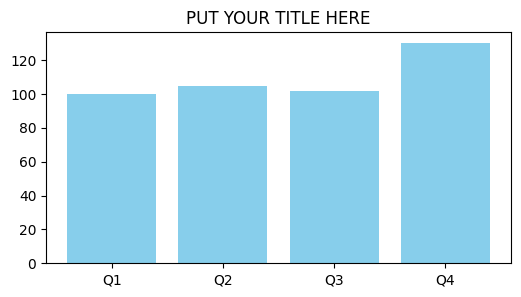

In [ ]:
# Question 2: Who is BIGGER? (Comparison) -> Bar Chart
plt.figure(figsize=(6, 3))
plt.bar(df_demo['Quarter'], df_demo['Sales'], color='skyblue')
plt.title("PUT YOUR TITLE HERE")
plt.show()

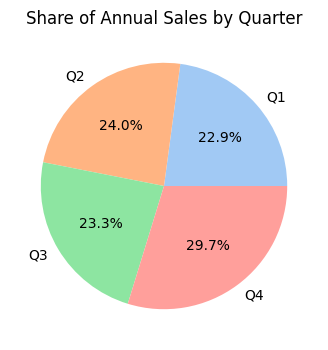

In [ ]:

# Question 3: Composition? -> Pie Chart (Use carefully!)
plt.figure(figsize=(4, 4))
plt.pie(df_demo['Sales'], labels=df_demo['Quarter'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Share of Annual Sales by Quarter")
plt.show()


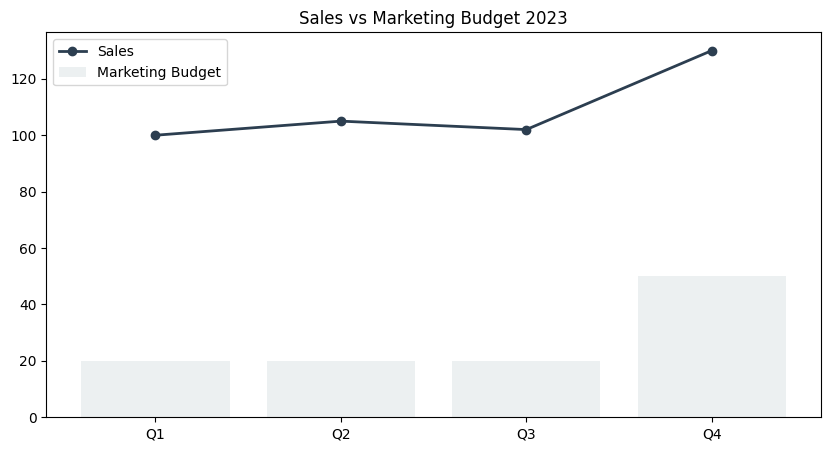

In [ ]:
# 1. Basic Chart - "What happened?"
plt.figure(figsize=(10, 5))

# Plotting Sales and Budget
budget = [20, 20, 20, 50]
plt.bar(df_demo['Quarter'], budget, color='#ecf0f1', label='Marketing Budget')
plt.plot(df_demo['Quarter'], df_demo['Sales'], marker='o', color='#2c3e50', linewidth=2, label='Sales')

plt.title("Sales vs Marketing Budget 2023")
plt.legend()
plt.show()

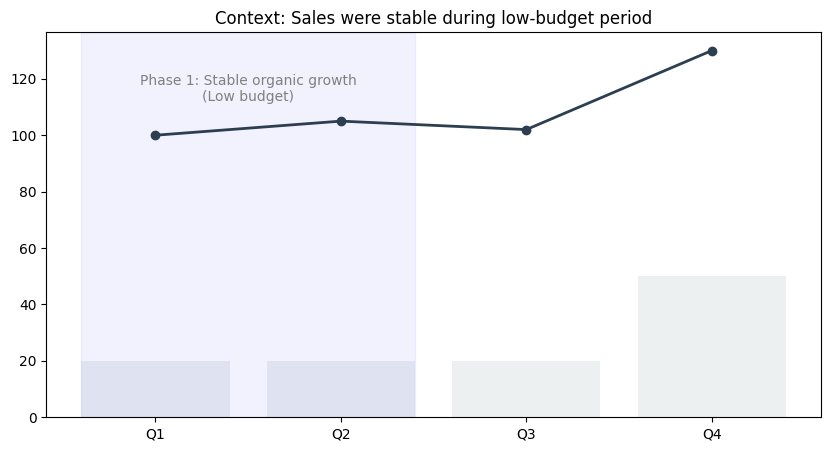

In [ ]:
# 2. Chart + Context - "What is normal?"
plt.figure(figsize=(10, 5))
plt.bar(df_demo['Quarter'], budget, color='#ecf0f1', label='Marketing Budget')
plt.plot(df_demo['Quarter'], df_demo['Sales'], marker='o', color='#2c3e50', linewidth=2)

# Context: Explaining the flat line
plt.text(0.5, 112, "Phase 1: Stable organic growth\n(Low budget)", color='gray', ha='center', fontsize=10)
plt.axvspan(-0.4, 1.4, color='blue', alpha=0.05) # Highlight the "boring" period

plt.title("Context: Sales were stable during low-budget period")
plt.show()

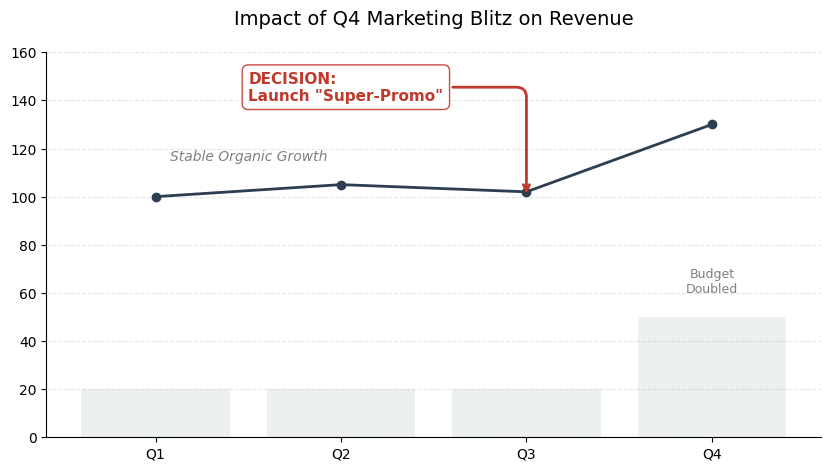

In [ ]:
# 3. Chart + Context + Action - "The Complete Story"
plt.figure(figsize=(10, 5))
# Context: Budget Bars
plt.bar(df_demo['Quarter'], budget, color='#ecf0f1', label='Marketing Budget')
# Main Data: Sales
plt.plot(df_demo['Quarter'], df_demo['Sales'], marker='o', color='#2c3e50', linewidth=2)

# 1. Context
plt.text(0.5, 115, "Stable Organic Growth", color='gray', ha='center', fontstyle='italic')

# 2. The "Smart" Arrow (Relatable Story)
# Connecting the visual space from the "Decision" (Left) to the "Outcome" (Right)
plt.annotate('DECISION:\nLaunch "Super-Promo"',
             xy=(2, 100),            # Target: The Sales Peak
             xytext=(0.5, 140),      # Source: Top Left (Timeline start)
             # Smart angle connector (Goes horizontal, then drops down)
             arrowprops=dict(arrowstyle="->", color='#c0392b', lw=2,
                            connectionstyle="angle,angleA=0,angleB=90,rad=10"),
             fontsize=11, color='#c0392b', fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="#c0392b", alpha=0.9))

# 3. Insight (The Why)
plt.text(3, 60, "Budget\nDoubled", ha='center', color='gray', fontsize=9)

# Polish
plt.title("Impact of Q4 Marketing Blitz on Revenue", fontsize=14, pad=20)
plt.ylim(0, 160)
sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

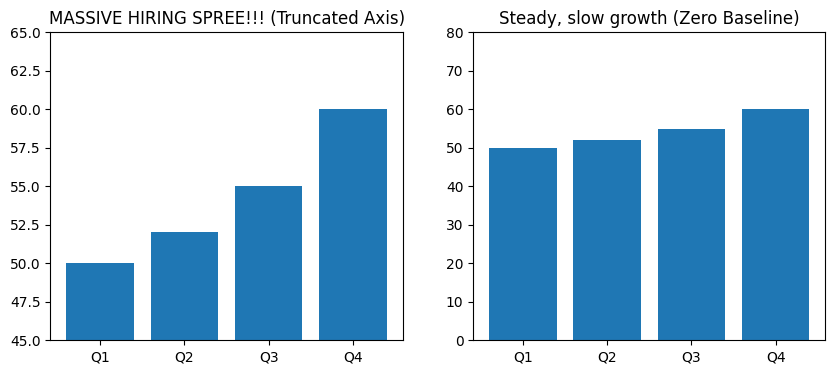

In [ ]:
# Truncated Y-Axis (Exaggerating growth)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(df_demo['Quarter'], df_demo['Employees'])
plt.ylim(45, 65) # <--- THE TRICK
plt.title("MASSIVE HIRING SPREE!!! (Truncated Axis)")

plt.subplot(1, 2, 2)
plt.bar(df_demo['Quarter'], df_demo['Employees'])
plt.ylim(0, 80) # <--- Honest Scale
plt.title("Steady, slow growth (Zero Baseline)")

plt.show()

#TASK
You are presenting monthly revenue to the Board. In April and May, there was a supply chain issue (Stockout) which caused a drop. The Board needs to see this immediately.

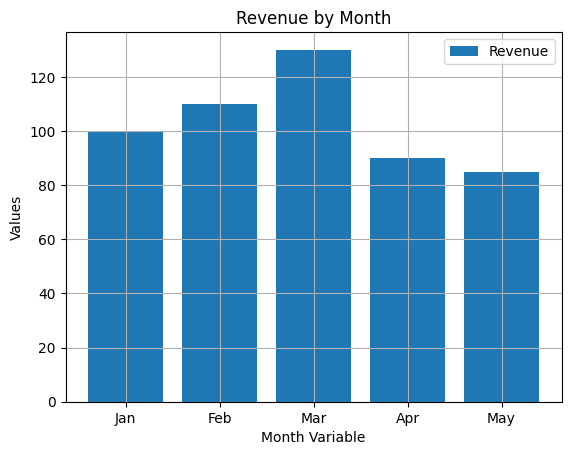

In [ ]:
df_sales = pd.DataFrame([
    {"month": "Jan", "revenue": 100},
    {"month": "Feb", "revenue": 110},
    {"month": "Mar", "revenue": 130},
    {"month": "Apr", "revenue": 90},  # Drop
    {"month": "May", "revenue": 85}   # Drop
])

plt.figure()
plt.bar(df_sales['month'], df_sales['revenue'])
plt.title("Revenue by Month") # Passive title
plt.xlabel("Month Variable")
plt.ylabel("Values")
plt.legend(["Revenue"])
plt.grid(True) # Clutter
plt.show()

1.  **Active Title:** Change "Revenue by Month" to a conclusion. Tell the story of the drop. (e.g., *"Revenue dropped 35% due to stockouts"*).
2.  **Color as Attention:** Highlight the "problem" months (Apr, May) in **RED**. Keep the others Gray.
3.  **Declutter (Data-Ink):**
    *   Remove the grid.
    *   Remove the top and right spines (frames).
    *   Add value labels directly on top of bars.
    *   Remove the Y-axis (since you have labels).

#SOLUTION

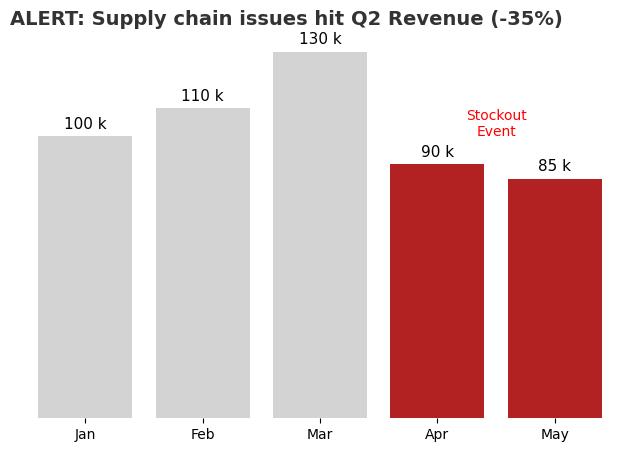

In [ ]:
# Define colors: Gray for normal, Red for attention
my_colors = ['lightgray', 'lightgray', 'lightgray', 'firebrick', 'firebrick']

plt.figure(figsize=(8, 5))
bars = plt.bar(df_sales['month'], df_sales['revenue'], color=my_colors)

# 1. Active Title
plt.title("ALERT: Supply chain issues hit Q2 Revenue (-35%)",
          fontsize=14, loc='left', fontweight='bold', color='#333333')

# 2. Declutter
plt.box(False) # Remove border
plt.grid(False) # Remove grid
plt.yticks([]) # Remove Y axis

# 3. Direct Labeling
plt.bar_label(bars, fmt='%.0f k', padding=3, fontsize=11)

# Context annotation (optional but good)
plt.text(3.5, 100, "Stockout\nEvent", color='red', ha='center')

plt.show()